# Theoretical Foundations of Buffer Stock Saving

<cite data-cite="6202365/8AH9AXN2"></cite>

<p style="text-align: center;"><small><small><small>Generator: BufferStockTheory-make/notebooks_byname</small></small></small></p>

[![econ-ark.org](https://img.shields.io/badge/Powered%20by-Econ--ARK-3e8acc.svg)](https://econ-ark.org/materials/BufferStockTheory)


<a id='interactive-dashboard'></a>

[This notebook](https://econ-ark.org/BufferStockTheory/#launch) uses the [Econ-ARK/HARK](https://github.com/econ-ark/HARK) toolkit to reproduce and illustrate key results of the paper [Theoretical Foundations of Buffer Stock Saving](http://econ-ark.github.io/BufferStockTheory/BufferStockTheory).

An [interactive dashboard](https://econ-ark.org/BufferStockStockTheory/#Dashboard) allows you to modify parameters to see how the figures change.

(In JupyterLab, click on the $~~\bullet\bullet\bullet~~$ patterns to expose the runnable code)

In [2]:
# This cell does some setup

# Import required python packages
from HARK.utilities import (plot_funcs, find_gui, make_figs, determine_platform,
                            test_latex_installation, setup_latex_env_notebook)
from HARK.ConsumptionSaving.ConsIndShockModel import init_perfect_foresight
from HARK import __version__ as HARKversion
from HARK.ConsumptionSaving.ConsIndShockModel \
    import (PerfForesightConsumerType, IndShockConsumerType)
from scipy.optimize import newton as zero_point_of
import numpy as np
from copy import deepcopy

from HARK.ConsumptionSaving.ConsIndShockModel \
    import init_idiosyncratic_shocks as base_params

# Plotting tools
import matplotlib.pyplot as plt

# Ignore some harmless but alarming warning messages
import warnings
warnings.filterwarnings("ignore")
from builtins import breakpoint

# breakpoint()
# Code to allow a master "Generator" and derived "Generated" versions
#   - allows "$nb-Problems-And-Solutions → $nb-Problems → $nb"
Generator = True  # Is this notebook the master or is it generated?

# Whether to save the figures to Figures_dir
saveFigs = True

# Whether to draw the figures
drawFigs = True

if HARKversion < '0.11.0':
    raise ImportError(
        'This notebook requires at least econ-ark v0.11.0,  please update your installation pip install -U econ-ark or conda install -c conda-forge econ-ark')

pf = determine_platform()
try:
    latexExists = test_latex_installation(pf)
except ImportError:  # windows and MacOS requires manual install
    latexExists = False

setup_latex_env_notebook(pf, latexExists)

In [3]:
# check if GUI is present if not then switch drawFigs to False and force saveFigs to be True
if not find_gui():
    drawFigs = False
    saveFigs = True

# Font sizes for figures
fssml = 18
fsmid = 22
fsbig = 26

# this can be removed if we pass in saveFigs and drawFigs in every call to make('figure')

def make(figure_name, target_dir="../../Figures"):
    make_figs(figure_name, saveFigs, drawFigs, target_dir)

In [4]:
drawFigs

True

## [The Problem](http://econ-ark.github.io/BufferStockTheory/BufferStockTheory/#The-Problem)

The paper defines and calibrates a small set of parameters:

\begin{align}
 &
\renewcommand{\APF}{\pmb{\unicode[0.55,0.05]{0x00DE}}}
\newcommand{\PatFac}{\pmb{\unicode[0.55,0.05]{0x00DE}}}
\newcommand{\PatRte}{\pmb{\unicode[0.55,0.05]{0x00FE}}}
\newcommand{\aLev}{\mathbf{a}}
\newcommand{\CRRA}{\rho}
\newcommand{\cLev}{\pmb{\mathrm{c}}}
\newcommand{\aNrm}{{a}}
\newcommand{\bNrm}{{b}}
\newcommand{\cNrm}{{c}}
\newcommand{\dNrm}{{d}}
\newcommand{\hNrm}{{h}}
\newcommand{\mNrm}{{m}}
\newcommand{\vNrm}{{v}}
\newcommand{\aLev}{\pmb{\mathrm{a}}}
\newcommand{\bLev}{\pmb{\mathrm{b}}}
\newcommand{\cLev}{\pmb{\mathrm{c}}}
\newcommand{\dLev}{\pmb{\mathrm{d}}}
\newcommand{\hLev}{\pmb{\mathrm{h}}}
\newcommand{\mLev}{\pmb{\mathrm{m}}}
\newcommand{\pLev}{\pmb{\mathrm{p}}}
\newcommand{\vLev}{\pmb{\mathrm{v}}}
\newcommand{\cFunc}{\mathrm{c}}
\newcommand{\uFunc}{\mathrm{u}}
\newcommand{\RNrm}{\mathcal{R}}
\newcommand{\DiscFac}{\beta}
\newcommand{\Ex}{\mathbb{E}}
\newcommand{\IncUnemp}{\mu}
\newcommand{\MPC}{\kappa}
\newcommand{\PermGroFac}{\Gamma}
\newcommand{\PermGroFacAdj}{\underline{\Gamma}}
\newcommand{\PermShkStd}{\sigma_\Psi}
\newcommand{\permShkStd}{\sigma_\psi}
\newcommand{\PermShk}{\Psi} % New
\newcommand{\permShk}{\psi} % New
\newcommand{\Rfree}{\mathsf{R}}
\newcommand{\Trg}{\hat}
\newcommand{\StE}{\check}
\newcommand{\Thorn}{\pmb{\TH}}
\newcommand{\TranShkStd}{\sigma_\Theta}
\newcommand{\TranShk}{\Theta}
\newcommand{\tranShk}{\theta}
\newcommand{\tranShkStd}{\sigma_{\theta}}
\newcommand{\UnempPrb}{\wp}
\newcommand\maththorn{\mathord{\pmb{\text{\TH}}}}
\end{align}

| Parameter | Description | Python Variable | Value |
|:---:      | :---:       | :---:  | :---: |
| $\PermGroFac$ | Permanent Income Growth Factor | $\texttt{PermGroFac}$ | 1.03 |
| $\Rfree$ | Interest Factor | $\texttt{Rfree}$ | 1.04 |
| $\DiscFac$ | Time Preference Factor | $\texttt{DiscFac}$ | 0.96 |
| $\CRRA$ | Coeﬃcient of Relative Risk Aversion| $\texttt{CRRA}$ | 2 |
| $\UnempPrb$ | Probability of Unemployment | $\texttt{UnempPrb}$ | 0.005 |
| $\tranShk^{\large u}$ | Income when Unemployed | $\texttt{IncUnemp}$ | 0. |
| $\permShkStd$ | Std Dev of Log Permanent Shock| $\texttt{PermShkStd}$ | 0.1 |
| $\TranShkStd$ | Std Dev of Log Transitory Shock| $\texttt{TranShkStd}$ | 0.1 |

that define the preferences and environment of microeconomic consumers as detailed below.

The objective of such a consumer with a horizon of $n$ periods is to maximize the value obtained from the stream of consumption __**c**__ from period $t=T-n$ to a terminal period $T$:

\begin{equation}
\mathbf{v}_{t} = \sum_{i=0}^{n} \DiscFac^{n}\mathrm{u}(\mathbf{c}_{t+n})
\end{equation}

The infinite-horizon solution is the limit of the first period solution $\mathrm{c}_{T-n}$ as the horizon $n$ goes to infinity.

### Details
For a microeconomic consumer who begins period $t$ with __**m**__arket resources boldface $\mLev_{t}$ (=net worth plus current income), the amount that remains after __**c**__onsumption of $\cLev_{t}$ will be end-of-period __**a**__ssets $\aLev_{t}$,

<!-- Next period's 'Balances' $B_{t+1}$ reflect this period's $\aLev_{t}$ augmented by return factor $R$:-->

\begin{eqnarray}
\aLev_{t}   &=&\mLev_{t}-\cLev_{t}. \notag
\end{eqnarray}

The consumer's __**p**__ermanent noncapital income $\pLev$ grows by a predictable factor $\PermGroFac$ and is subject to an unpredictable multiplicative shock $\Ex_{t}[\permShk_{t+1}]=1$,

\begin{eqnarray}
\pLev_{t+1} & = & \pLev_{t} \PermGroFac \permShk_{t+1}, \notag
\end{eqnarray}

and, if the consumer is employed, actual income is permanent income multiplied by a transitory shock $\tranShk^{\large e}$.  There is also a probability $\UnempPrb$ that the consumer will be temporarily unemployed and experience income of $\tranShk^{\large u}  = 0$.  We construct $\tranShk^{\large e}$ so that its mean value is $1/(1-\UnempPrb)$ because in that case the mean level of the transitory shock (accounting for both unemployed and employed states) is exactly

\begin{eqnarray}
\Ex_{t}[\tranShk_{t+1}] & = & \tranShk^{\large{u}}  \times \UnempPrb + (1-\UnempPrb) \times \Ex_{t}[\tranShk^{\large{e}}_{t+1}] \notag
\\ & = & 0 \times \UnempPrb + (1-\UnempPrb) \times 1/(1-\UnempPrb)  \notag
\\ & = & 1. \notag
\end{eqnarray}

  We can combine the unemployment shock $\tranShk^{\large u}$ and the transitory shock to employment income $\tranShk^{\large e}$ into $\tranShk _{t+1}$, so that next period's market resources are
\begin{eqnarray}
    \mLev_{t+1} &=& \aLev_{t}\Rfree +\pLev_{t+1}\tranShk_{t+1}.  \notag
\end{eqnarray}

When the consumer has a CRRA utility function $u(\cLev)=\frac{\cLev^{1-\CRRA}}{1-\CRRA}$, the paper shows that the problem can be written in terms of ratios (nonbold font) of level (bold font) variables to permanent income, e.g. $m_{t} \equiv \mLev_{t}/\pLev_{t}$, and the Bellman form of [the problem reduces to](https://econ-ark.github.io/BufferStockTheory/#The-Related-Problem):

\begin{eqnarray*}
v_t(m_t) &=& \max_{c_t}~~ u(c_t) + \DiscFac~\Ex_{t} [(\PermGroFac\permShk_{t+1})^{1-\CRRA} v_{t+1}(m_{t+1}) ] \\
& s.t. & \\
a_t &=& m_t - c_t \\
m_{t+1} &=& a_t \Rfree/(\PermGroFac \permShk_{t+1}) + \tranShk_{t+1} \\
\end{eqnarray*}

In [5]:
# Define a dictionary with baseline parameter values

In [6]:
# Import default parameter values (init_idiosyncratic_shock)

# Set the parameters for the baseline results in the paper
# using the variable names defined in the cell above
base_params['PermGroFac'] = [1.03]  # Permanent income growth factor
base_params['Rfree'] = Rfree = 1.04  # Interest factor on assets
base_params['DiscFac'] = DiscFac = 0.96  # Time Preference Factor
base_params['CRRA'] = CRRA = 2.00  # Coefficient of relative risk aversion
# Probability of unemployment (e.g. Probability of Zero Income in the paper)
base_params['UnempPrb'] = UnempPrb = 0.005
base_params['IncUnemp'] = IncUnemp = 0.0   # Induces natural borrowing constraint
base_params['permShkStd'] = [0.1]   # Standard deviation of log permanent income shocks
base_params['tranShkStd'] = [0.1]   # Standard deviation of log transitory income shocks

In [7]:
# Uninteresting housekeeping and details
# Make global variables for the things that were lists above -- uninteresting housekeeping
PermGroFac, permShkStd, tranShkStd = base_params['PermGroFac'][0], base_params['permShkStd'][0], base_params['tranShkStd'][0]

# Some technical settings that are not interesting for our purposes
base_params['LivPrb'] = [1.0]   # 100 percent probability of living to next period
base_params['CubicBool'] = True    # Use cubic spline interpolation
base_params['T_cycle'] = 1       # No 'seasonal' cycles
base_params['BoroCnstArt'] = None    # No artificial borrowing constraint

## Convergence of the Consumption Rules

Under the given parameter values, [the paper's first figure](https://econ-ark.github.io/BufferStockTheory/#Convergence-of-the-Consumption-Rules) depicts the successive consumption rules that apply in the last period of life $(c_{T}(m))$, the second-to-last period, and earlier periods $(c_{T-n})$.  The consumption function to which these converge is $c(m)$:

$$
c(m) = \lim_{n \uparrow \infty} c_{T-n}(m) \notag
$$


In [8]:
# Create a buffer stock consumer instance by invoking the IndShockConsumerType class

In [9]:
# with the built-in parameter dictionary "base_params"
breakpoint()
# Construct finite horizon agent with baseline parameters
baseAgent_Fin = IndShockConsumerType(**base_params, solverType='DARKolo', verbose=False)
#baseAgent_Fin = IndShockConsumerType(**base_params)
baseAgent_Fin.cycles = 100   # Set finite horizon (T = 100)

baseAgent_Fin.solve(verbose=False)        # Solve the model
baseAgent_Fin.unpack('cFunc')  # Make the consumption function easily accessible

	DiscFac: 0.96
	LivPrb: 1.0
	CRRA: 2.0
	Rfree: 1.04
	PermGroFac: 1.03
	transitions_possible: {'chosen_to_next_BOP': {'kNrm': 'kNrm = aNrm'},
 'chosen_to_next_choice': {'kNrm': 'kNrm = aNrm',
  'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)',
  'bNrm': 'bNrm = kNrm * RNrm',
  'yNrm': 'yNrm = tranShk',
  'mNrm': 'mNrm = bNrm + yNrm'},
 'choice_to_chosen': {'aNrm': 'aNrm = mNrm - cNrm'},
 'BOP_to_choice': {'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)',
  'bNrm': 'bNrm = kNrm * RNrm',
  'yNrm': 'yNrm = tranShk',
  'mNrm': 'mNrm = bNrm + yNrm'}}
	IncShkDstn: <HARK.distribution.DiscreteDistribution at 0x7fcca8e9d9d0>
	permShkDstn: <HARK.distribution.DiscreteDistribution at 0x7fcca8e9c040>
	tranShkDstn: <HARK.distribution.DiscreteDistribution at 0x7fccf83287f0>
	BoroCnstArt: None
	MaxKinks: None
	solverType: 'HARK'
	solveMethod: 'EGM'
	eventTiming: 'EOP'
	horizon: 'infinite'
	permPos: 0
	tranPos: 1
	permShkValsBcst: array([0.85043016, 0.85043016, 0.85043016, ..., 1.16640616, 1.16640616,
   



The Absolute Patience Factor for the supplied parameter values, APF=0.9991996797437437, satisfies the Absolute Impatience Condition (AIC), which requires APF < 1:
    https://econ-ark.github.io/BufferStockTheory/#AIC
  Because the APF < 1,  the absolute amount of consumption is expected to fall over time.  





The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.





The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.





The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m





The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m





The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    





The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    





The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=0.979199473737575, satisfies the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target level of the individual market resources ratio m exists.




The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=0.979199473737575, satisfies the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target level of the individual market resources ratio m exists.




The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)





The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)





The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)





The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



....................................................................................................

In [10]:
# Plot the different consumption rules for the different periods

Saving figure cFuncsConverge in ../../Figures


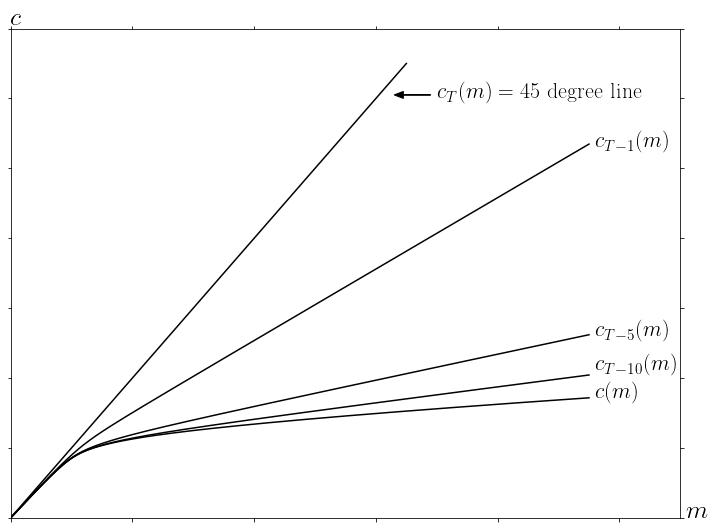

In [11]:
mPlotMin = 0
mLocCLabels = 9.6  # Defines horizontal limit of figure
mPlotTop = 6.5    # Defines maximum m value where functions are plotted
mPts = 1000      # Number of points at which functions are evaluated

mBelwLabels = np.linspace(mPlotMin, mLocCLabels-0.1, mPts)  # Range of m below loc of labels
m_FullRange = np.linspace(mPlotMin, mPlotTop, mPts)        # Full plot range
# c_Tm0  defines the last period consumption rule (c=m)
c_Tm0 = m_FullRange
# c_Tm1 defines the second-to-last period consumption rule
c_Tm1 = baseAgent_Fin.cFunc[-2](mBelwLabels)
c_Tm5 = baseAgent_Fin.cFunc[-6](mBelwLabels)  # c_Tm5 defines the T-5 period consumption rule
c_Tm10 = baseAgent_Fin.cFunc[-11](mBelwLabels)  # c_Tm10 defines the T-10 period consumption rule
# c_Limt defines limiting inﬁnite-horizon consumption rule
c_Limt = baseAgent_Fin.cFunc[0](mBelwLabels)
plt.figure(figsize=(12, 9))
plt.plot(mBelwLabels, c_Limt, color="black")
plt.plot(mBelwLabels, c_Tm1, color="black")
plt.plot(mBelwLabels, c_Tm5, color="black")
plt.plot(mBelwLabels, c_Tm10, color="black")
plt.plot(m_FullRange, c_Tm0, color="black")
plt.xlim(0, 11)
plt.ylim(0, 7)
plt.text(7.0, 6.0, r'$c_{T   }(m) = 45$ degree line', fontsize=22, fontweight='bold')
plt.text(mLocCLabels, 5.3, r'$c_{T-1 }(m)$', fontsize=22, fontweight='bold')
plt.text(mLocCLabels, 2.6, r'$c_{T-5 }(m)$', fontsize=22, fontweight='bold')
plt.text(mLocCLabels, 2.1, r'$c_{T-10}(m)$', fontsize=22, fontweight='bold')
plt.text(mLocCLabels, 1.7, r'$c(m)       $', fontsize=22, fontweight='bold')
plt.arrow(6.9, 6.05, -0.6, 0, head_width=0.1, width=0.001,
          facecolor='black', length_includes_head='True')
plt.tick_params(labelbottom=False, labelleft=False, left='off',
                right='off', bottom='off', top='off')
plt.text(0, 7.05, "$c$", fontsize=26)
plt.text(11.1, 0, "$m$", fontsize=26)
# Save the figures in several formats

make('cFuncsConverge')  # Comment out if you want to run uninterrupted

Use the [interactive dashboard](#interactive-dashboard) to explore the effects of changes in patience, risk aversion, or risk

### PROBLEM: Natural Borrowing Constraint Approaches Artificial Constraint

Show numerically the result that is proven analytically in [The-Liquidity-Constrained-Solution-as-a-Limit](https://econ-ark.github.io/BufferStockTheory/#The-Liquidity-Constrained-Solution-as-a-Limit), by solving the model for successively smaller values of $\UnempPrb$.
   * You need only to solve for the second-to-last period of life to do this
      * `TwoPeriodModel = IndShockConsumerType(**base_params)`
      * `TwoPeriodModel.cycles = 2   # Make this type have a two period horizon (Set T = 2)`

   * You should show the consumption rules for different values of $\UnempPrb$ on the same graph
      * To make this easier, you will want to use the plot_funcs command:
         * `from HARK.utilities import plot_funcs_der, plot_funcs`

Create a cell or cells in the notebook below this cell and put your solution there; comment on the size of $\UnempPrb$ needed to make the two models visually indistinguishable

	DiscFac: 0.96
	LivPrb: 1.0
	CRRA: 2.0
	Rfree: 1.04
	PermGroFac: 1.03
	transitions_possible: {'chosen_to_next_BOP': {'kNrm': 'kNrm = aNrm'},
 'chosen_to_next_choice': {'kNrm': 'kNrm = aNrm',
  'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)',
  'bNrm': 'bNrm = kNrm * RNrm',
  'yNrm': 'yNrm = tranShk',
  'mNrm': 'mNrm = bNrm + yNrm'},
 'choice_to_chosen': {'aNrm': 'aNrm = mNrm - cNrm'},
 'BOP_to_choice': {'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)',
  'bNrm': 'bNrm = kNrm * RNrm',
  'yNrm': 'yNrm = tranShk',
  'mNrm': 'mNrm = bNrm + yNrm'}}
	IncShkDstn: <HARK.distribution.DiscreteDistribution at 0x7fcd08405b20>
	permShkDstn: <HARK.distribution.DiscreteDistribution at 0x7fcca91d9400>
	tranShkDstn: <HARK.distribution.DiscreteDistribution at 0x7fcca91d9460>
	BoroCnstArt: 0.0
	MaxKinks: None
	solverType: 'HARK'
	solveMethod: 'EGM'
	eventTiming: 'EOP'
	horizon: 'infinite'
	permPos: 0
	tranPos: 1
	permShkValsBcst: array([0.85043016, 0.85043016, 0.85043016, ..., 1.16640616, 1.16640616,
    



The Absolute Patience Factor for the supplied parameter values, APF=0.9991996797437437, satisfies the Absolute Impatience Condition (AIC), which requires APF < 1:
    https://econ-ark.github.io/BufferStockTheory/#AIC
  Because the APF < 1,  the absolute amount of consumption is expected to fall over time.  





The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.





The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.





The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m





The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m





The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    





The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    





The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=0.979199473737575, satisfies the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target level of the individual market resources ratio m exists.


The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=0.979199473737575, satisfies the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target level of the individual market resources ratio m exists.




The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=0.979199473737575, satisfies the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target level of the individual market resources ratio m exists.




The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)





The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)





The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)





The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



..	DiscFac: 0.96
	LivPrb: 1.0
	CRRA: 2.0
	Rfree: 1.04
	PermGroFac: 1.03
	transitions_possible: {'chosen_to_next_BOP': {'kNrm': 'kNrm = aNrm'},
 'chosen_to_next_choice': {'kNrm': 'kNrm = aNrm',
  'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)',
  'bNrm': 'bNrm = kNrm * RNrm',
  'yNrm': 'yNrm = tranShk',
  'mNrm': 'mNrm = bNrm + yNrm'},
 'choice_to_chosen': {'aNrm': 'aNrm = mNrm - cNrm'},
 'BOP_to_choice': {'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)',
  'bNrm': 'bNrm = kNrm * RNrm',
  'yNrm': 'yNrm = tranShk',
  'mNrm': 'mNrm = bNrm + yNrm'}}
	IncShkDstn: <HARK.distribution.DiscreteDistribution at 0x7fcca91d5670>
	permShkDstn: <HARK.distribution.DiscreteDistribution at 0x7fcca91fc430>
	tranShkDstn: <HARK.distribution.DiscreteDistribution at 0x7fcca91fc2e0>
	BoroCnstArt: None
	MaxKinks: None
	solverType: 'HARK'
	solveMethod: 'EGM'
	eventTiming: 'EOP'
	horizon: 'infinite'
	permPos: 0
	tranPos: 1
	permShkValsBcst: array([0.85043016, 0.85043016, 0.85043016, ..., 1.16640616, 1.16640616,
 



The Absolute Patience Factor for the supplied parameter values, APF=0.9991996797437437, satisfies the Absolute Impatience Condition (AIC), which requires APF < 1:
    https://econ-ark.github.io/BufferStockTheory/#AIC
  Because the APF < 1,  the absolute amount of consumption is expected to fall over time.  





The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function 



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.





The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m





The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m





The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individua



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    





The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=0.979199473737575, satisfies the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target level of the individual market resources ratio m exists.


The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=0.979199473737575, satisfies the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target level of the individual market resources ratio m exists.


The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=0.979199473737575, satisfies the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target level of the individual market resources ratio m exists



The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=0.979199473737575, satisfies the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target level of the individual market resources ratio m exists.




The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Agg



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)





The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



..	DiscFac: 0.96
	LivPrb: 1.0
	CRRA: 2.0
	Rfree: 1.04
	PermGroFac: 1.03
	transitions_possible: {'chosen_to_next_BOP': {'kNrm': 'kNrm = aNrm'},
 'chosen_to_next_choice': {'kNrm': 'kNrm = aNrm',
  'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)',
  'bNrm': 'bNrm = kNrm * RNrm',
  'yNrm': 'yNrm = tranShk',
  'mNrm': 'mNrm = bNrm + yNrm'},
 'choice_to_chosen': {'aNrm': 'aNrm = mNrm - cNrm'},
 'BOP_to_choice': {'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)',
  'bNrm': 'bNrm = kNrm * RNrm',
  'yNrm': 'yNrm = tranShk',
  'mNrm': 'mNrm = bNrm + yNrm'}}
	IncShkDstn: <HARK.distribution.DiscreteDistribution at 0x7fcca9012b80>
	permShkDstn: <HARK.distribution.DiscreteDistribution at 0x7fcca9024820>
	tranShkDstn: <HARK.distribution.DiscreteDistribution at 0x7fcca90248e0>
	BoroCnstArt: None
	MaxKinks: None
	solverType: 'HARK'
	solveMethod: 'EGM'
	eventTiming: 'EOP'
	horizon: 'infinite'
	permPos: 0
	tranPos: 1
	permShkValsBcst: array([0.85043016, 0.85043016, 0.85043016, ..., 1.16640616, 1.16640616,
 



The Absolute Patience Factor for the supplied parameter values, APF=0.9991996797437437, satisfies the Absolute Impatience Condition (AIC), which requires APF < 1:
    https://econ-ark.github.io/BufferStockTheory/#AIC
  Because the APF < 1,  the absolute amount of consumption is expected to fall over time.  





The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function 



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.





The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC)



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m





The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individua



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    





The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=0.979199473737575, satisfies the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target level of the individual market resources ratio m exists.


The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=0.979199473737575, satisfies the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target level of the individual market resources ratio m exists.


The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=0.979199473737575, satisfies the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target level of the individual market resources ratio m exists



The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=0.979199473737575, satisfies the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target level of the individual market resources ratio m exists.




The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Agg



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)





The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



Some model parameter has changed since last update.
Some model parameter has changed since last update.
Some model parameter has changed since last update.
Some model parameter has changed since last update.


Some model parameter has changed since last update.


Storing new parameters and updating shocks and grid.
Storing new parameters and updating shocks and grid.
Storing new parameters and updating shocks and grid.
Storing new parameters and updating shocks and grid.


Storing new parameters and updating shocks and grid.


.Some model parameter has changed since last update.
Some model parameter has changed since last update.
Some model parameter has changed since last update.
Some model parameter has changed since last update.


Some model parameter has changed since last update.


Storing new parameters and updating shocks and grid.
Storing new parameters and updating shocks and grid.
Storing new parameters and updating shocks and grid.
Storing new parameters and updating shocks and grid.


Storing new parameters and updating shocks and grid.


.Some model parameter has changed since last update.
Some model parameter has changed since last update.
Some model parameter has changed since last update.
Some model parameter has changed since last update.


Some model parameter has changed since last update.


Storing new parameters and updating shocks and grid.
Storing new parameters and updating shocks and grid.
Storing new parameters and updating shocks and grid.
Storing new parameters and updating shocks and grid.


Storing new parameters and updating shocks and grid.


.

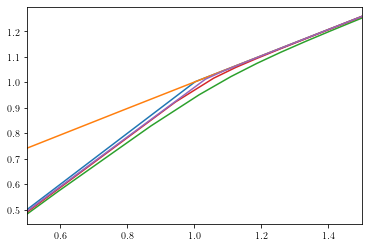

Drawing and storing solution


In [12]:
# SOLUTION

# Turns out that we have to make the probability REALLY small

# Construct solution for truly constrained consumer
BoroCnst_par = deepcopy(base_params)
BoroCnst_par['CubicBool'] = False  # Cubic approx does not work will with kinks
BoroCnst_par['UnempPrb'] = 0  # No risk of unemployment, just transitory shocks
BoroCnst_par['BoroCnstArt'] = 0.0  # Cannot borrow more than 0.0 of permanent income
# baseBoroCnst['IncUnemp'] = 0.3  # Assume unemployment insurance of 0.3

baseBoroCnstEx = IndShockConsumerType(**BoroCnst_par, verbose=False)
baseBoroCnstEx.cycles = 2
baseBoroCnstEx.solve(verbose=False)
baseBoroCnstEx.unpack('cFunc')

cFuncList = list()  # Create empty list for storing consumption functions

# Period [-1] is period-T solution (c=m)
# Period [-2] is the first 'interesting' period (where constraint matters)
cFuncList.append(baseBoroCnstEx.cFunc[-2])

# Now set up unconstrained two period solution
unconstr_par = deepcopy(BoroCnst_par)
#unconst_params['IncUnemp'] = 0.3 # If unemployed,income is zero
unconstr_par['BoroCnstArt'] = None # No 'artificial' constraint

unconstAgent = IndShockConsumerType(**unconstr_par, verbose=False) # base_params has no constraint
unconstAgent.cycles = 2     # Make this type have a two period horizon (Set T = 2)

unconstAgent_base = deepcopy(unconstAgent)
unconstAgent_base.solve(verbose=False)        # Solve the model under baseline parameter values
unconstAgent_base.unpack('cFunc')  # Make the consumption function easily accessible
cFuncList.append(unconstAgent_base.cFunc[-2])

# Consumption function for unconstrained
#cFuncList0.append(unconstAgent_base.cFunc[-2])
# cFuncList0=deepcopy(cFuncList)
#cFuncList = list()  # Create empty list for storing consumption functions
unconstAgentList = list()
# Now consider three alternative values of unemployment probability
UnempPrbList = [0.001, 0.0001, 0.00001 ]
unconstr_With_Risk_of_Zero_income_par = deepcopy(unconstr_par)
unconstr_With_Risk_of_Zero_income_par['IncUnemp'] = 0.0

unconstr_with_risk = IndShockConsumerType(**unconstr_With_Risk_of_Zero_income_par)
i = 0

for UnempPrb in UnempPrbList:
    unconstAgentNow = deepcopy(unconstr_with_risk)
    unconstAgentNow.UnempPrb = UnempPrb
    unconstAgentNow.update_income_process()  # After changing parameters, recompute distn
    unconstAgentNow.solve()
    unconstAgentNow.unpack('cFunc')
    cFuncList.append(unconstAgentNow.cFunc[0])  # Get the T-1 c function
    unconstAgentList.append(unconstAgentList)
    i += 1

# Zoom in on consumption function in a region near the BoroCnstArt kink point
RangeAroundPermInc = 0.5
PermIncNorm = 1
plot_funcs(cFuncList, PermIncNorm-RangeAroundPermInc, PermIncNorm+RangeAroundPermInc)

print('Drawing and storing solution')
if drawFigs:
    plt.show()
plt.close()

## Factors and Conditions

### [The Finite Human Wealth Condition](http://econ-ark.github.io/BufferStockTheory/#Human-Wealth)

Human wealth for a perfect foresight consumer is the present discounted value of future income:

\begin{eqnarray}\notag
\hLev_{t} & = & \Ex_{t}[\pLev_{t} + \Rfree^{-1} \pLev_{t+1} + \Rfree^{2} \pLev_{t+2} ... ] \\ \notag
      & = & \pLev_{t} \left(1 + (\PermGroFac/\Rfree) + (\PermGroFac/\Rfree)^{2} ... \right)
\end{eqnarray}
which approaches infinity as the horizon extends if $\PermGroFac/\Rfree \geq 1$.  We say that the 'Finite Human Wealth Condition' [(FHWC)](https://econ-ark.github.io/BufferStockTheory/#FHWC) holds if
$0 \leq (\PermGroFac/\Rfree) < 1$.

### [Absolute Patience and the AIC](https://econ-ark.github.io/BufferStockTheory/#AIC)

The paper defines the Absolute Patience Factor [(APF)](https://econ-ark.github.io/BufferStockTheory/#APF) as being equal to the ratio $\cLev_{t+1}/\cLev_{t}$ for a perfect foresight consumer.  The Old English character <span style="font-size:larger;">"&#222;"</span> used for this object in the paper cannot currently be rendered conveniently in Jupyter notebooks, so we will substitute $\APF$ here:

\begin{equation}
\PatFac = (\Rfree \DiscFac)^{1/\CRRA}
\end{equation}

If $\APF = 1$, a perfect foresight consumer will spend at exactly the level of $\cLev$ that can be sustained perpetually (given their current and future resources).  If $\APF < 1$ (the consumer is 'absolutely impatient'; or, 'the absolute impatience condition holds'), the consumer is consuming more than the sustainable amount, so consumption will fall, and if the consumer is 'absolutely patient' with $\APF > 1$ consumption will grow over time.



### [Growth Patience and the GICRaw](https://econ-ark.github.io/BufferStockTheory/#GIC)

For a [perfect foresight consumer](https://www.econ2.jhu.edu/people/ccarroll/public/lecturenotes/consumption/PerfForesightCRRA), whether the ratio $c$=__**c**__/__**p**__ is rising, constant, or falling depends on the relative growth rates of consumption and permanent income; that ratio is measured by the [Perfect Foresight Growth Patience Factor](https://econ-ark.github.io/BufferStockTheory/#PFGPF):

\begin{eqnarray}
\APF_{\PermGroFac} & = & \APF/\PermGroFac
\end{eqnarray}
and whether the $c$ is falling or rising over time depends on whether $\APF_{\PermGroFac}$ is below or above 1.

An analogous condition can be defined when there is uncertainty about permanent income.  Defining $\tilde{\PermGroFac} = (\Ex[\permShk^{-1}])^{-1}\PermGroFac$, the 'Growth Impatience Condition' [(GICRaw)](https://econ-ark.github.io/BufferStockTheory/#GIC) determines whether, _in expectation_, the stochastic value of $c$ is rising, constant, or falling over time:
\begin{eqnarray}
  \APF/\underline{\PermGroFac} & < & 1
\end{eqnarray}

In [13]:
# baseBoroCnstEx.solution[0].c_where_Ex_PermShk_times_mtp1_minus_mt_eq_0_new(1,baseBoroCnst)

### [The Finite Value of Autarky Condition (FVAC)](https://econ-ark.github.io/BufferStockTheory/#Autarky-Value)

The paper [shows](https://econ-ark.github.io/BufferStockTheory/#Autarky-Value) that a consumer who planned to spend his permanent income $\{ \pLev_{t}, \pLev_{t+1}, ...\} $ in every period would have value defined by

\begin{equation*}
\vLev_{t}^{\text{autarky}} = \uFunc(\pLev_{t})\left(\frac{1}{1-\DiscFac \PermGroFac^{1-\CRRA} \Ex[\permShk^{1-\CRRA}]}\right)
\end{equation*}

and defines the 'Finite Value of Autarky Condition' as the requirement that the denominator be a positive finite number:

\begin{equation*}
\DiscFac \PermGroFac^{1-\CRRA} \Ex[\permShk^{1-\CRRA}] < 1
\end{equation*}

### [The Weak Return Impatience Condition (WRIC)](https://econ-ark.github.io/BufferStockTheory/#WRIC)

The [Return Impatience Condition](https://econ-ark.github.io/BufferStockTheory/#RIC) $\APF/\Rfree < 1$ has long been understood to be required for the perfect foresight model to have a nondegenerate solution (a common special case is when $\CRRA=1$; in this case $\APF = \Rfree \DiscFac$ so $\APF<1$ reduces to $\DiscFac < \Rfree$).

If the RIC does not hold, the consumer is so patient that the optimal consumption function approaches zero as the horizon extends indefinitely.

When the probability of unemployment is $\UnempPrb$, the paper articulates an analogous (but weaker) condition:

\begin{eqnarray}
 \UnempPrb^{1/\CRRA} \APF/\Rfree & < & 1
\end{eqnarray}

# Key Results

## [Nondegenerate Solution Requires FVAC and WRIC](https://econ-ark.github.io/BufferStockTheory/#Sufficient-Conditions-For-Nondegenerate-Solution)

A main result of the paper is that the conditions required for the model to have a nondegenerate solution ($0 < c(m) < \infty$ for feasible $m$) are that the Finite Value of Autarky (FVAC) and Weak Return Impatience Condition (WRIC) hold.

## [Natural Borrowing Constraint limits to Artificial Borrowing Constraint](https://econ-ark.github.io/BufferStockTheory/#The-Liquidity-Constrained-Solution-as-a-Limit)

Defining $\chi(\UnempPrb)$ as the consumption function associated with any particular value of $\UnempPrb$, and defining $\hat{\chi}$ as the consumption function that would apply in the absence of the zero-income shocks but in the presence of an 'artificial' borrowing constraint requiring $a \geq 0$ (_a la_ Deaton (1991)), the paper shows that

\begin{eqnarray}
\lim_{\UnempPrb \downarrow 0}~\chi(\UnempPrb) & = & \hat{\chi}
\end{eqnarray}

That is, as $\UnempPrb$ approaches zero the problem with uncertainty becomes identical to the problem that instead has constraints.  (See [Precautionary Saving and Liquidity Constraints](https://econ-ark.github.io/LiqConstr) for a full treatment of the relationship between precautionary saving and liquidity constraints).

## [$\cFunc(m)$ can be Finite Even When Human Wealth Is Infinite](https://econ-ark.github.io/BufferStockTheory/#When-The-GICRaw-Fails)

In the perfect foresight model, if $\Rfree < \PermGroFac$ the PDV of future labor income approaches infinity and so the limiting consumption function is $c(m) = \infty$ for all $m$.  Many models have no well-defined solution when human wealth is infinite.

The presence of uncertainty changes this: Even when limiting human wealth is infinite, the limiting consumption function is finite for all values of $m$.

This is because uncertainty imposes a "natural borrowing constraint" that deters the consumer from borrowing against their unbounded (but uncertain) future labor income.

A [table](https://econ-ark.github.io/BufferStockTheory/#Sufficient-Conditions-For-Nondegenerate-Solution) puts this result in the context of implications of other conditions and restrictions.



## [Unique and Stable Values of $\mNrm$](https://econ-ark.github.io/BufferStockTheory/#Unique-Stable-Points)

Assuming that the **FVAC** and **WRIC** hold so that the problem has a nondegenerate solution, under more stringent conditions its dynamics may also exhibit stability.  Two particularly useful kinds of stability are existence of a 'target' value of market resources $\Trg{\mNrm}$ and a 'pseudo-steady-state' value $\StE{\mNrm}$.

### [If the GIC-Nrm Holds, $\exists$ a finite 'target' $\mNrm$](https://econ-ark.github.io/BufferStockTheory/#onetarget)

Section [Individual Target Wealth](https://econ-ark.github.io/BufferStockTheory/#onetarget) shows that, under parameter values for which the limiting consumption function exists, if the GICRaw holds then there will be a value $\Trg{m}$ such that:

\begin{eqnarray*}
\Ex[m_{t+1}] & > & m_{t}~\text{if $m_{t} < \Trg{m}$} \\
\Ex[m_{t+1}] & < & m_{t}~\text{if $m_{t} > \Trg{m}$} \\
\Ex[m_{t+1}] & = & m_{t}~\text{if $m_{t} = \Trg{m}$}
\end{eqnarray*}

[An equation](https://econ-ark.github.io/BufferStockTheory/#mTargImplicit) in the paper tells us that if $\mNrm_{t}=\Trg{m}$ then:
\begin{align}
(\Trg{\mNrm}-\cFunc(\Trg{\mNrm}))\bar{\RNrm}+1 & = \Trg{\mNrm}
%\\ \Trg{\mNrm}(1-\bar{\RNrm}^{-1})+\bar{\RNrm}^{-1} & = \Trg{\cNrm}
%\\ \Trg{\cNrm} & = \Trg{\mNrm} - (\Trg{\mNrm} - 1)\bar{\RNrm}^{-1}
\end{align}
which can be solved numerically for the unique $\mNrm$ that satisfies it.

### [If the GIC Holds, $\exists$ a finite 'pseudo-steady-state' $\mNrm$](https://econ-ark.github.io/BufferStockTheory/#Collective-Stability)

Section [Collective Stability and the Pseudo-Steady-State](https://econ-ark.github.io/BufferStockTheory/#Collective-Stability) shows that, under parameter values for which the limiting consumption function exists, if the **GIC** holds then there will be a value $\Trg{m}$ such that:

\begin{eqnarray*}
\Ex_{t}[\mLev_{t+1}/\mLev_{t}] & > & \PermGroFac~\text{if $m_{t} < \StE{m}$} \\
\Ex_{t}[\mLev_{t+1}/\mLev_{t}] & < & \PermGroFac~\text{if $m_{t} > \StE{m}$} \\
\Ex_{t}[\mLev_{t+1}/\mLev_{t}] & = & \PermGroFac~\text{if $m_{t} = \StE{m}$}
\end{eqnarray*}

[An equation](https://econ-ark.github.io/BufferStockTheory/#balgrostableSolve) in the paper tells us that if $\mNrm_{t}=\StE{m}$ then:
\begin{align}
(\StE{\mNrm}-\cFunc(\StE{\mNrm}))\RNrm+1 & = \StE{\mNrm}
\end{align}
which can be solved numerically for the unique $\StE{\mNrm}$ that satisfies it.


### [Example With Finite Pseudo-Steady-State But Infinite Target Wealth](https://econ-ark.github.io/BufferStockTheory/#GICNrmFailsButGICRawHolds)

[A figure](https://econ-ark.github.io/BufferStockTheory/#GICNrmFailsButGICRawHolds) depicts a solution when the **FVAC** (Finite Value of Autarky Condition) and **WRIC** hold (so that the model has a solution), the **GIC** holds, so the model has a pseudo-steady-state $\StE{\mNrm}$, but the **GIC-Nrm** fails, so the model does not have an individual target wealth ratio $\Trg{\mNrm}$ (or, rather, the target wealth ratio is infinity, as can be seen by the fact that the level of $\cNrm$ is always below the level that would keep $\Ex_{t}[\Delta \mNrm_{t+1}] = 0$)

This example was constructed by quadrupling the variance of the permanent shocks from the baseline parameterization

In [14]:
# GICNrmFailsButGICRawHolds Example
GICNrmFailsButGICRawHoldsDict = dict(base_params)
GICNrmFailsButGICRawHoldsDict['permShkStd'] = [0.2]  # Increase patience by increasing risk

GICNrmFailsButGICRawHolds = IndShockConsumerType(
    cycles=0,  # cycles=0 makes this an infinite horizon consumer
    quiet = False, # Check the conditions at setup
    **GICNrmFailsButGICRawHoldsDict)

# Solve the model for these parameter values
GICNrmFailsButGICRawHolds.tolerance=float('inf')
GICNrmFailsButGICRawHolds.solve(verbose=3)
ag=GICNrmFailsButGICRawHolds
sol=ag.solution[0]
#breakpoint()
# Because we are trying to solve a problem very close to the critical patience 
# values, we want to do it with extra precision to be sure we've gotten the 
# answer right.  We can retrieve the distance between the last two solutions:

distance_original = GICNrmFailsButGICRawHolds.solution[0].distance_last

# But high precision would have slowed things down if we used it from the beginning

# Instead, we can take the solution obtained above, and continue it but with
# parameters that will yield a more preciase answer

# Solve with quadrupe the normal range
GICNrmFailsButGICRawHoldsDict['aXtraMax'] = base_params['aXtraMax'] * 4

# Solve over a four times as many gridpoints
GICNrmFailsButGICRawHoldsDict['aXtraCount'] = base_params['aXtraCount'] * 4

# Solve to a 10 times tighter degree of error tolerance
GICNrmFailsButGICRawHolds.tolerance = GICNrmFailsButGICRawHolds.tolerance/10

# When the solver reaches its tolerance threshold, it changes the solver
# attribute stge_kind to have 'iter_status' of 'finished'
# If we want to continue the solution (having changed something, as above)
# To continue the solution from where we left off, we just change the 
# we just change 'iter_status' to 'iterator' and tell it to ".solve()" again

GICNrmFailsButGICRawHolds.solution[0].stge_kind['iter_status'] = 'iterator'
GICNrmFailsButGICRawHolds.solve(verbose=0) # continue solving

# Test whether the new solution meets a tighter tolerance than before: 
distance_now = GICNrmFailsButGICRawHolds.solution[0].distance_last 
print('distance_now < distance_original: '+str(distance_now < distance_original))

.	DiscFac: 0.96
	LivPrb: 1.0
	CRRA: 2.0
	Rfree: 1.04
	PermGroFac: 1.03
	transitions_possible: {'chosen_to_next_BOP': {'kNrm': 'kNrm = aNrm'},
 'chosen_to_next_choice': {'kNrm': 'kNrm = aNrm',
  'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)',
  'bNrm': 'bNrm = kNrm * RNrm',
  'yNrm': 'yNrm = tranShk',
  'mNrm': 'mNrm = bNrm + yNrm'},
 'choice_to_chosen': {'aNrm': 'aNrm = mNrm - cNrm'},
 'BOP_to_choice': {'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)',
  'bNrm': 'bNrm = kNrm * RNrm',
  'yNrm': 'yNrm = tranShk',
  'mNrm': 'mNrm = bNrm + yNrm'}}
	IncShkDstn: <HARK.distribution.DiscreteDistribution at 0x7fcca8e9de80>
	permShkDstn: <HARK.distribution.DiscreteDistribution at 0x7fcd08405f40>
	tranShkDstn: <HARK.distribution.DiscreteDistribution at 0x7fccc8d06b80>
	BoroCnstArt: None
	MaxKinks: None
	solverType: 'HARK'
	solveMethod: 'EGM'
	eventTiming: 'EOP'
	horizon: 'infinite'
	permPos: 0
	tranPos: 1
	permShkValsBcst: array([0.71732977, 0.71732977, 0.71732977, ..., 1.34970321, 1.34970321,
  



The Absolute Patience Factor for the supplied parameter values, APF=0.9991996797437437, satisfies the Absolute Impatience Condition (AIC), which requires APF < 1:
    https://econ-ark.github.io/BufferStockTheory/#AIC
  Because the APF < 1,  the absolute amount of consumption is expected to fall over time.  





The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function 



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.





The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC)



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m





The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individua



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    





The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=1.0069735758414422, violates the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target ratio of individual market resources to individual permanent income does not exist.  (https://econ-ark.github.io/BufferStockTheory/#GICNrm)



The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=1.0069735758414422, violates the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target ratio of individual market resources to individual permanent income does not exist.  (https://econ-ark.github.io/BufferStockTheory/#GICNrm)



The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=1.0069735758414422, violates the Normalized Growth Impatience Condition (GI



The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=1.0069735758414422, violates the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target ratio of individual market resources to individual permanent income does not exist.  (https://econ-ark.github.io/BufferStockTheory/#GICNrm)





The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Agg



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)





The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.
Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.
Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.
Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.
Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.


Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.


.Finished cycle # 000001 in  0.014537 seconds, solution distance = 1.000e+03

For a model with the following parameter values:

{'DiscFac': 0.96, 'LivPrb': 1.0, 'CRRA': 2.0, 'Rfree': 1.04, 'PermGroFac': 1.03, 'transitions_possible': {'chosen_to_next_BOP': {'kNrm': 'kNrm = aNrm'}, 'chosen_to_next_choice': {'kNrm': 'kNrm = aNrm', 'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}, 'choice_to_chosen': {'aNrm': 'aNrm = mNrm - cNrm'}, 'BOP_to_choice': {'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}}, 'IncShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcca8e9de80>, 'permShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcd08405f40>, 'tranShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fccc8d06b80>, 'BoroCnstArt': None, 'MaxKinks': None, 'solverType': 'HARK', 'solveMethod': 'EGM',


For a model with the following parameter values:

{'DiscFac': 0.96, 'LivPrb': 1.0, 'CRRA': 2.0, 'Rfree': 1.04, 'PermGroFac': 1.03, 'transitions_possible': {'chosen_to_next_BOP': {'kNrm': 'kNrm = aNrm'}, 'chosen_to_next_choice': {'kNrm': 'kNrm = aNrm', 'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}, 'choice_to_chosen': {'aNrm': 'aNrm = mNrm - cNrm'}, 'BOP_to_choice': {'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}}, 'IncShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcca8e9de80>, 'permShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcd08405f40>, 'tranShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fccc8d06b80>, 'BoroCnstArt': None, 'MaxKinks': None, 'solverType': 'HARK', 'solveMethod': 'EGM', 'eventTiming': 'EOP', 'horizon': 'infinite', 'permPos': 0, 'tranPos': 1, 'pe

{'DiscFac': 0.96, 'LivPrb': 1.0, 'CRRA': 2.0, 'Rfree': 1.04, 'PermGroFac': 1.03, 'transitions_possible': {'chosen_to_next_BOP': {'kNrm': 'kNrm = aNrm'}, 'chosen_to_next_choice': {'kNrm': 'kNrm = aNrm', 'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}, 'choice_to_chosen': {'aNrm': 'aNrm = mNrm - cNrm'}, 'BOP_to_choice': {'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}}, 'IncShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcca8e9de80>, 'permShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcd08405f40>, 'tranShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fccc8d06b80>, 'BoroCnstArt': None, 'MaxKinks': None, 'solverType': 'HARK', 'solveMethod': 'EGM', 'eventTiming': 'EOP', 'horizon': 'infinite', 'permPos': 0, 'tranPos': 1, 'permShkValsBcst': array([0.71732977, 0.71732977, 0.71

{'DiscFac': 0.96, 'LivPrb': 1.0, 'CRRA': 2.0, 'Rfree': 1.04, 'PermGroFac': 1.03, 'transitions_possible': {'chosen_to_next_BOP': {'kNrm': 'kNrm = aNrm'}, 'chosen_to_next_choice': {'kNrm': 'kNrm = aNrm', 'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}, 'choice_to_chosen': {'aNrm': 'aNrm = mNrm - cNrm'}, 'BOP_to_choice': {'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}}, 'IncShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcca8e9de80>, 'permShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcd08405f40>, 'tranShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fccc8d06b80>, 'BoroCnstArt': None, 'MaxKinks': None, 'solverType': 'HARK', 'solveMethod': 'EGM', 'eventTiming': 'EOP', 'horizon': 'infinite', 'permPos': 0, 'tranPos': 1, 'permShkValsBcst': array([0.71732977, 0.71732977, 0.71

	DiscFac: None
None
None
None
None
None


None


0.96
None
None
None
None
None
None


None


	LivPrb: None
None
None
None
None
None


None


1.0
None
None
None
None
None
None


None


	CRRA: None
None
None
None
None
None


None


2.0
None
None
None
None
None
None


None


	Rfree: None
None
None
None
None
None


None


1.04
None
None
None
None
None
None


None


	PermGroFac: None
None
None
None
None
None


None


1.03
None
None
None
None
None
None


None


	transitions_possible: None
None
None
None
None
None


None


{'chosen_to_next_BOP': {'kNrm': 'kNrm = aNrm'},
 'chosen_to_next_choice': {'kNrm': 'kNrm = aNrm',
  'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)',
  'bNrm': 'bNrm = kNrm * RNrm',
  'yNrm': 'yNrm = tranShk',
  'mNrm': 'mNrm = bNrm + yNrm'},
 'choice_to_chosen': {'aNrm': 'aNrm = mNrm - cNrm'},
 'BOP_to_choice': {'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)',
  'bNrm': 'bNrm = kNrm * RNrm',
  'yNrm': 'yNrm = tranShk',
  'mNrm': 'mNrm = bNrm + yNrm'}}
None
None
None
None
None
None


None


	IncShkDstn: None
None
None
None
None
None


None


None
None
None
None
None
None


None


	permShkDstn: None
None
None
None
None
None


None


None
None
None
None
None
None


None


	tranShkDstn: None
None
None
None
None
None


None


None
None
None
None
None
None


None


	BoroCnstArt: None
None
None
None
None
None


None


None
None
None
None
None
None
None


None


	MaxKinks: None
None
None
None
None
None


None


None
None
None
None
None
None
None


None


	solverType: None
None
None
None
None
None


None


'HARK'
None
None
None
None
None
None


None


	solveMethod: None
None
None
None
None
None


None


'EGM'
None
None
None
None
None
None


None


	eventTiming: None
None
None
None
None
None


None


'EOP'
None
None
None
None
None
None


None


	horizon: None
None
None
None
None
None


None


'infinite'
None
None
None
None
None
None


None


	permPos: None
None
None
None
None
None


None


0
None
None
None
None
None
None


None


	tranPos: None
None
None
None
None
None


None


1
None
None
None
None
None
None


None


	permShkValsBcst: None
None
None
None
None
None


None


array([0.71732977, 0.71732977, 0.71732977, ..., 1.34970321, 1.34970321,
       1.34970321])
None
None
None
None
None
None


None


	tranShkValsBcst: None
None
None
None
None
None


None


array([0.        , 0.85470368, 0.92323938, ..., 1.0376015 , 1.08339327,
       1.1722675 ])
None
None
None
None
None
None


None


	ShkPrbs: None
None
None
None
None
None


None


array([0.00071429, 0.02030612, 0.02030612, ..., 0.02030612, 0.02030612,
       0.02030612])
None
None
None
None
None
None


None


	permShkPrbs: None
None
None
None
None
None


None


array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])
None
None
None
None
None
None


None


	permShkVals: None
None
None
None
None
None


None


array([0.71732977, 0.83564387, 0.91080317, 0.98040953, 1.05540223,
       1.15070822, 1.34970321])
None
None
None
None
None
None


None


	tranShkPrbs: None
None
None
None
None
None


None


array([0.005     , 0.14214286, 0.14214286, 0.14214286, 0.14214286,
       0.14214286, 0.14214286, 0.14214286])
None
None
None
None
None
None


None


	tranShkVals: None
None
None
None
None
None


None


array([0.        , 0.85470368, 0.92323938, 0.96390423, 1.00006632,
       1.0376015 , 1.08339327, 1.1722675 ])
None
None
None
None
None
None


None


	permShkMin: None
None
None
None
None
None


None


0.717329773242414
None
None
None
None
None
None


None


	tranShkMin: None
None
None
None
None
None


None


0.0
None
None
None
None
None
None


None


	permShkMax: None
None
None
None
None
None


None


1.3497032102824327
None
None
None
None
None
None


None


	tranShkMax: None
None
None
None
None
None


None


1.1722675022653286
None
None
None
None
None
None


None


	UnempPrb: None
None
None
None
None
None


None


0.005
None
None
None
None
None
None


None


	inc_min_Prb: None
None
None
None
None
None


None


0.004999999999999999
None
None
None
None
None
None


None


	inc_max_Prb: None
None
None
None
None
None


None


0.020306122448979603
None
None
None
None
None
None


None


	inc_max_Val: None
None
None
None
None
None


None


1.5822132111172829
None
None
None
None
None
None


None


	DiscLiv: None
None
None
None
None
None


None


0.96
None
None
None
None
None
None


None



The following results hold:


The following results hold:


The following results hold:


The following results hold:


The following results hold:


The following results hold:




The following results hold:





The Absolute Patience Factor for the supplied parameter values, APF=0.9991996797437437, satisfies the Absolute Impatience Condition (AIC), which requires APF < 1:
    https://econ-ark.github.io/BufferStockTheory/#AIC
  Because the APF < 1,  the absolute amount of consumption is expected to fall over time.  



The Absolute Patience Factor for the supplied parameter values, APF=0.9991996797437437, satisfies the Absolute Impatience Condition (AIC), which requires APF < 1:
    https://econ-ark.github.io/BufferStockTheory/#AIC
  Because the APF < 1,  the absolute amount of consumption is expected to fall over time.  



The Absolute Patience Factor for the supplied parameter values, APF=0.9991996797437437, satisfies the Absolute Impatience Condition (AIC), which requires APF < 1:
    https://econ-ark.github.io/BufferStockTheory/#AIC
  Because the APF < 1,  the absolute amount of consumption is expected to fall over time.  



The Absolute Patience Factor for the supplied parameter values



The Absolute Patience Factor for the supplied parameter values, APF=0.9991996797437437, satisfies the Absolute Impatience Condition (AIC), which requires APF < 1:
    https://econ-ark.github.io/BufferStockTheory/#AIC
  Because the APF < 1,  the absolute amount of consumption is expected to fall over time.  





The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function 



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.





The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC)



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m





The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individua



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    





The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=1.0069735758414422, violates the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target ratio of individual market resources to individual permanent income does not exist.  (https://econ-ark.github.io/BufferStockTheory/#GICNrm)



The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=1.0069735758414422, violates the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target ratio of individual market resources to individual permanent income does not exist.  (https://econ-ark.github.io/BufferStockTheory/#GICNrm)



The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=1.0069735758414422, violates the Normalized Growth Impatience Condition (GI



The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=1.0069735758414422, violates the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target ratio of individual market resources to individual permanent income does not exist.  (https://econ-ark.github.io/BufferStockTheory/#GICNrm)





The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Agg



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)





The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.
Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.
Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.
Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.
Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.
Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent 

Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.


.
For a model with the following parameter values:

{'DiscFac': 0.96, 'LivPrb': 1.0, 'CRRA': 2.0, 'Rfree': 1.04, 'PermGroFac': 1.03, 'transitions_possible': {'chosen_to_next_BOP': {'kNrm': 'kNrm = aNrm'}, 'chosen_to_next_choice': {'kNrm': 'kNrm = aNrm', 'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}, 'choice_to_chosen': {'aNrm': 'aNrm = mNrm - cNrm'}, 'BOP_to_choice': {'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}}, 'IncShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcca8e9de80>, 'permShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcd08405f40>, 'tranShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fccc8d06b80>, 'BoroCnstArt': None, 'MaxKinks': None, 'solverType': 'HARK', 'solveMethod': 'EGM', 'eventTiming': 'EOP', 'horizon': 'infinite', 'permPos': 0, 'tranPos': 1, 'p


For a model with the following parameter values:

{'DiscFac': 0.96, 'LivPrb': 1.0, 'CRRA': 2.0, 'Rfree': 1.04, 'PermGroFac': 1.03, 'transitions_possible': {'chosen_to_next_BOP': {'kNrm': 'kNrm = aNrm'}, 'chosen_to_next_choice': {'kNrm': 'kNrm = aNrm', 'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}, 'choice_to_chosen': {'aNrm': 'aNrm = mNrm - cNrm'}, 'BOP_to_choice': {'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}}, 'IncShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcca8e9de80>, 'permShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcd08405f40>, 'tranShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fccc8d06b80>, 'BoroCnstArt': None, 'MaxKinks': None, 'solverType': 'HARK', 'solveMethod': 'EGM', 'eventTiming': 'EOP', 'horizon': 'infinite', 'permPos': 0, 'tranPos': 1, 'pe

{'DiscFac': 0.96, 'LivPrb': 1.0, 'CRRA': 2.0, 'Rfree': 1.04, 'PermGroFac': 1.03, 'transitions_possible': {'chosen_to_next_BOP': {'kNrm': 'kNrm = aNrm'}, 'chosen_to_next_choice': {'kNrm': 'kNrm = aNrm', 'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}, 'choice_to_chosen': {'aNrm': 'aNrm = mNrm - cNrm'}, 'BOP_to_choice': {'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}}, 'IncShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcca8e9de80>, 'permShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcd08405f40>, 'tranShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fccc8d06b80>, 'BoroCnstArt': None, 'MaxKinks': None, 'solverType': 'HARK', 'solveMethod': 'EGM', 'eventTiming': 'EOP', 'horizon': 'infinite', 'permPos': 0, 'tranPos': 1, 'permShkValsBcst': array([0.71732977, 0.71732977, 0.71

{'DiscFac': 0.96, 'LivPrb': 1.0, 'CRRA': 2.0, 'Rfree': 1.04, 'PermGroFac': 1.03, 'transitions_possible': {'chosen_to_next_BOP': {'kNrm': 'kNrm = aNrm'}, 'chosen_to_next_choice': {'kNrm': 'kNrm = aNrm', 'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}, 'choice_to_chosen': {'aNrm': 'aNrm = mNrm - cNrm'}, 'BOP_to_choice': {'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)', 'bNrm': 'bNrm = kNrm * RNrm', 'yNrm': 'yNrm = tranShk', 'mNrm': 'mNrm = bNrm + yNrm'}}, 'IncShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcca8e9de80>, 'permShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fcd08405f40>, 'tranShkDstn': <HARK.distribution.DiscreteDistribution object at 0x7fccc8d06b80>, 'BoroCnstArt': None, 'MaxKinks': None, 'solverType': 'HARK', 'solveMethod': 'EGM', 'eventTiming': 'EOP', 'horizon': 'infinite', 'permPos': 0, 'tranPos': 1, 'permShkValsBcst': array([0.71732977, 0.71732977, 0.71

	DiscFac: None
None
None
None
None
None
None


None


0.96
None
None
None
None
None
None
None


None


	LivPrb: None
None
None
None
None
None
None


None


1.0
None
None
None
None
None
None
None


None


	CRRA: None
None
None
None
None
None
None


None


2.0
None
None
None
None
None
None
None


None


	Rfree: None
None
None
None
None
None
None


None


1.04
None
None
None
None
None
None
None


None


	PermGroFac: None
None
None
None
None
None
None


None


1.03
None
None
None
None
None
None
None


None


	transitions_possible: None
None
None
None
None
None
None


None


{'chosen_to_next_BOP': {'kNrm': 'kNrm = aNrm'},
 'chosen_to_next_choice': {'kNrm': 'kNrm = aNrm',
  'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)',
  'bNrm': 'bNrm = kNrm * RNrm',
  'yNrm': 'yNrm = tranShk',
  'mNrm': 'mNrm = bNrm + yNrm'},
 'choice_to_chosen': {'aNrm': 'aNrm = mNrm - cNrm'},
 'BOP_to_choice': {'RNrm': 'RNrm = Rfree / (PermGroFac * permShk)',
  'bNrm': 'bNrm = kNrm * RNrm',
  'yNrm': 'yNrm = tranShk',
  'mNrm': 'mNrm = bNrm + yNrm'}}
None
None
None
None
None
None
None


None


	IncShkDstn: None
None
None
None
None
None
None


None


None
None
None
None
None
None
None


None


	permShkDstn: None
None
None
None
None
None
None


None


None
None
None
None
None
None
None


None


	tranShkDstn: None
None
None
None
None
None
None


None


None
None
None
None
None
None
None


None


	BoroCnstArt: None
None
None
None
None
None
None


None


None
None
None
None
None
None
None
None


None


	MaxKinks: None
None
None
None
None
None
None


None


None
None
None
None
None
None
None
None


None


	solverType: None
None
None
None
None
None
None


None


'HARK'
None
None
None
None
None
None
None


None


	solveMethod: None
None
None
None
None
None
None


None


'EGM'
None
None
None
None
None
None
None


None


	eventTiming: None
None
None
None
None
None
None


None


'EOP'
None
None
None
None
None
None
None


None


	horizon: None
None
None
None
None
None
None


None


'infinite'
None
None
None
None
None
None
None


None


	permPos: None
None
None
None
None
None
None


None


0
None
None
None
None
None
None
None


None


	tranPos: None
None
None
None
None
None
None


None


1
None
None
None
None
None
None
None


None


	permShkValsBcst: None
None
None
None
None
None
None


None


array([0.71732977, 0.71732977, 0.71732977, ..., 1.34970321, 1.34970321,
       1.34970321])
None
None
None
None
None
None
None


None


	tranShkValsBcst: None
None
None
None
None
None
None


None


array([0.        , 0.85470368, 0.92323938, ..., 1.0376015 , 1.08339327,
       1.1722675 ])
None
None
None
None
None
None
None


None


	ShkPrbs: None
None
None
None
None
None
None


None


array([0.00071429, 0.02030612, 0.02030612, ..., 0.02030612, 0.02030612,
       0.02030612])
None
None
None
None
None
None
None


None


	permShkPrbs: None
None
None
None
None
None
None


None


array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])
None
None
None
None
None
None
None


None


	permShkVals: None
None
None
None
None
None
None


None


array([0.71732977, 0.83564387, 0.91080317, 0.98040953, 1.05540223,
       1.15070822, 1.34970321])
None
None
None
None
None
None
None


None


	tranShkPrbs: None
None
None
None
None
None
None


None


array([0.005     , 0.14214286, 0.14214286, 0.14214286, 0.14214286,
       0.14214286, 0.14214286, 0.14214286])
None
None
None
None
None
None
None


None


	tranShkVals: None
None
None
None
None
None
None


None


array([0.        , 0.85470368, 0.92323938, 0.96390423, 1.00006632,
       1.0376015 , 1.08339327, 1.1722675 ])
None
None
None
None
None
None
None


None


	permShkMin: None
None
None
None
None
None
None


None


0.717329773242414
None
None
None
None
None
None
None


None


	tranShkMin: None
None
None
None
None
None
None


None


0.0
None
None
None
None
None
None
None


None


	permShkMax: None
None
None
None
None
None
None


None


1.3497032102824327
None
None
None
None
None
None
None


None


	tranShkMax: None
None
None
None
None
None
None


None


1.1722675022653286
None
None
None
None
None
None
None


None


	UnempPrb: None
None
None
None
None
None
None


None


0.005
None
None
None
None
None
None
None


None


	inc_min_Prb: None
None
None
None
None
None
None


None


0.004999999999999999
None
None
None
None
None
None
None


None


	inc_max_Prb: None
None
None
None
None
None
None


None


0.020306122448979603
None
None
None
None
None
None
None


None


	inc_max_Val: None
None
None
None
None
None
None


None


1.5822132111172829
None
None
None
None
None
None
None


None


	DiscLiv: None
None
None
None
None
None
None


None


0.96
None
None
None
None
None
None
None


None



The following results hold:


The following results hold:


The following results hold:


The following results hold:


The following results hold:


The following results hold:


The following results hold:




The following results hold:





The Absolute Patience Factor for the supplied parameter values, APF=0.9991996797437437, satisfies the Absolute Impatience Condition (AIC), which requires APF < 1:
    https://econ-ark.github.io/BufferStockTheory/#AIC
  Because the APF < 1,  the absolute amount of consumption is expected to fall over time.  



The Absolute Patience Factor for the supplied parameter values, APF=0.9991996797437437, satisfies the Absolute Impatience Condition (AIC), which requires APF < 1:
    https://econ-ark.github.io/BufferStockTheory/#AIC
  Because the APF < 1,  the absolute amount of consumption is expected to fall over time.  



The Absolute Patience Factor for the supplied parameter values, APF=0.9991996797437437, satisfies the Absolute Impatience Condition (AIC), which requires APF < 1:
    https://econ-ark.github.io/BufferStockTheory/#AIC
  Because the APF < 1,  the absolute amount of consumption is expected to fall over time.  



The Absolute Patience Factor for the supplied parameter values



The Absolute Patience Factor for the supplied parameter values, APF=0.9991996797437437, satisfies the Absolute Impatience Condition (AIC), which requires APF < 1:
    https://econ-ark.github.io/BufferStockTheory/#AIC
  Because the APF < 1,  the absolute amount of consumption is expected to fall over time.  





The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function 



The Finite Human Wealth Factor for the supplied parameter values, FHWF=0.9903846153846154, satisfies the Finite Human Wealth Condition (FHWC), which requires FHWF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FHWC
  Therefore, the limiting consumption function is not c(m)=Infinity.
  Human wealth normalized by permanent income is 104.00000000000037.





The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC)



The Return Patience Factor for the supplied parameter values, RPF= 0.9607689228305227, satisfies the Return Impatience Condition (RIC), which requires RPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#RPF
  Therefore, the limiting consumption function is not c(m)=0 for all m





The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individua



The Growth Patience Factor for the supplied parameter values, GPF=0.9700967764502365, satisfies the Growth Impatience Condition (GIC), which requires GPF < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICRaw
  Therefore,  for a perfect foresight consumer, the ratio of individual wealth to permanent income is expected to fall indefinitely.    





The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=1.0069735758414422, violates the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target ratio of individual market resources to individual permanent income does not exist.  (https://econ-ark.github.io/BufferStockTheory/#GICNrm)



The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=1.0069735758414422, violates the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target ratio of individual market resources to individual permanent income does not exist.  (https://econ-ark.github.io/BufferStockTheory/#GICNrm)



The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=1.0069735758414422, violates the Normalized Growth Impatience Condition (GI



The Normalized Growth Patience Factor GPFNrm for the supplied parameter values, GPFNrm=1.0069735758414422, violates the Normalized Growth Impatience Condition (GICNrm), which requires GPFNrm < 1:
    https://econ-ark.github.io/BufferStockTheory/#GICNrm
  Therefore, a target ratio of individual market resources to individual permanent income does not exist.  (https://econ-ark.github.io/BufferStockTheory/#GICNrm)





The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Agg



The Mortality Adjusted Aggregate Growth Patience Factor for the supplied parameter values, GPFLiv=0.9700967764502365, satisfies the Mortality Adjusted Aggregate Growth Impatience Condition (GICLiv):
    https://econ-ark.github.io/BufferStockTheory/#GPFLiv
  Therefore, a target level of the ratio of aggregate market resources to aggregate permanent income exists (https://econ-ark.github.io/BufferStockTheory/#GPFLiv)





The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



The Finite Value of Autarky Factor for the supplied parameter values, FVAF=0.96, satisfies the Finite Value of Autarky Condition, which requires FVAF < 1:
    https://econ-ark.github.io/BufferStockTheory/#FVAC
  Therefore, a nondegenerate solution exists if the RIC also holds. (https://econ-ark.github.io/BufferStockTheory/#FVAC)



Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.
Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.
Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.
Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.
Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.
Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent 

Because the model's parameters do not satisfy the stochastic-growth-normalized GIC, it does not exhibit a target ratio of assets (or cash-on-hand) to permanent income.


distance_now < distance_original: True


In [15]:
E = soln.E_tp1_
yMax = E.c_where_E_tp1_m_tp1_minus_m_t_eq_0(xMax)*1.3

NameError: name 'soln' is not defined

In [ ]:
# Plot GICNrmFailsButGICRawHolds

#fig = plt.figure(figsize = (12,8))
# ax  = fig.add_subplot(111)

soln = GICNrmFailsButGICRawHolds.solution[0]  # Short alias for solution
Bilt= soln.Bilt
Pars= soln.Pars
E_t = soln.E_tp1_

fig, ax = plt.subplots(figsize=(12, 8))
[xMin, xMax] = [0.0, 8.0]
yMin = 0.0
yMax = E.c_where_E_tp1_m_tp1_minus_m_t_eq_0(xMax)*1.3

mPltVals = np.linspace(xMin, xMax, mPts)

if latexExists:
    c_Stable_Ind_txt = "$\Ex_{t}[\Delta m_{t+1}] = 0$"
    c_Stable_Agg_txt = "$\Ex_{t}[\pmb{\mathrm{m}}_{t+1}/\pmb{\mathrm{m}}_{t}] = \PermGroFac$"
else:
    c_Stable_Ind_txt = "$\mathsf{E}_{t}[\Delta m_{t+1}] = 0$"
    c_Stable_Agg_txt = "$\mathsf{E}_{t}[\mathbf{m}_{t+1}/\mathbf{m}_{t}] = \PermGroFac$"


cVals_Lmting_color = "black"
c_Stable_Agg_color = "black"  # "blue"
c_Stable_Ind_color = "black"  # "red"

cVals_Lmting = Bilt.cFunc(mPltVals)
c_Stable_Ind = E_t.c_where_E_tp1_m_tp1_minus_m_t_eq_0(mPltVals)
c_Stable_Agg = E_t.c_where_E_tp1_permShk_times_m_tp1_minus_m_t_eq_0(
    mPltVals)

cVals_Lmting_lbl, = ax.plot(mPltVals, cVals_Lmting, color=cVals_Lmting_color)
c_Stable_Ind_lbl, = ax.plot(mPltVals, c_Stable_Ind,
                            color=c_Stable_Ind_color, linestyle="dashed", label=c_Stable_Ind_txt)
c_Stable_Agg_lbl, = ax.plot(mPltVals, c_Stable_Agg,
                            color=c_Stable_Agg_color, linestyle="dotted", label=c_Stable_Agg_txt)

ax.set_xlim(xMin, xMax)
ax.set_ylim(yMin, yMax)
ax.set_xlabel("$\mathit{m}$", fontweight='bold', fontsize=fsmid, loc="right")
ax.set_ylabel("$\mathit{c}$", fontweight='bold', fontsize=fsmid, loc="top", rotation=0)
# plt.text(xMin,yMax+0.03, "$c$", fontsize=26)
# plt.text(xMax-0.05,yMin, "$m$", fontsize=26)
ax.tick_params(labelbottom=False, labelleft=False, left='off',
               right='off', bottom='off', top='off')

#ax.arrow(0.98, 0.62, -0.2, 0, head_width=0.02, width=0.001,facecolor='black', length_includes_head='True')
#ax.arrow(2.2, 1.2, 0.3, -0.05, head_width=0.02, width=0.001,facecolor='black', length_includes_head='True')

ax.legend(handles=[c_Stable_Ind_lbl, c_Stable_Agg_lbl])
ax.legend(prop=dict(size=fsmid))

starting_search_at_m_t = 1.0
mNrmStE = \
    zero_point_of(E_t.permShk_tp1_times_m_tp1_minus_m_t,
                  starting_search_at_m_t)
#mNrmStE = soln.mNrmStE
cNrmStE = c_Stable_Agg = E_t.permShk_times_m_tp1_minus_m_t_eq_0(
    mNrmStE)
#mNrmStE_lbl, = ax.plot([mNrmStE,mNrmStE],[yMin,yMax],color="green",linestyle="--",label='Pseudo-Steady-State: $\mathbb{E}_{t}[\pmb{m}_{t+1}/\pmb{m}_{t}]=\Gamma$')

ax.plot(mNrmStE, cNrmStE, marker=".", markersize=15, color="black")  # Dot at StE point
ax.text(1, 0.6, "$\mathrm{c}(m_{t})$", fontsize=fsmid)  # label cFunc

if latexExists:
    ax.text(mNrmStE+0.02, cNrmStE-0.10, r"$\nwarrow$", fontsize=fsmid)
    ax.text(mNrmStE+0.25, cNrmStE-0.18, r"$\StE{m}~$", fontsize=fsmid)
else:
    ax.text(mNrmStE+0.02, cNrmStE-0.10, r"$\nwarrow$", fontsize=fsmid)
    ax.text(mNrmStE+0.25, cNrmStE-0.18, r"$\StE{m}~$", fontsize=fsmid)

make('GICNrmFailsButGICRawHolds')
print('Finite mNrmStE but infinite mNrmTrg')

In the [interactive dashboard](#interactive-dashboard), see what happens as changes in the time preference rate (or changes in risk $\permShkStd$) change the consumer from _normalized-growth-patient_ $(\APF > \tilde{\PermGroFac})$ to _normalized-growth-impatient_ ($\APF < \tilde{\PermGroFac}$)

As a foundation for the remaining figures, we define another instance of the class $\texttt{IndShockConsumerType}$, which has the same parameter values as the instance $\texttt{baseAgent}$ defined previously but is solved to convergence (our definition of an infinite horizon agent type) instead of only 100 periods


In [ ]:
# Find the infinite horizon solution

In [ ]:
base_params['aXtraCount'] = base_params['aXtraCount'] * 20
base_params['CubicBool'] = False
baseAgent_Inf = IndShockConsumerType(cycles=0    # Infinite horizon
                                     , verbose=0  # solve silently
                                     , quiet=False
                                     , **base_params)
baseAgent_Inf.solve()

### [Target $m$, Expected Consumption Growth, and Permanent Income Growth](https://econ-ark.github.io/BufferStockTheory/#AnalysisoftheConvergedConsumptionFunction)

The next figure, [Analysis of the Converged Consumption Function](https://econ-ark.github.io/BufferStockTheory/#cGroTargetFig), shows expected growth factors for the levels of consumption $\cLev$ and market resources $\mLev$ as a function of the market resources ratio $\mNrm$ for a consumer behaving according to the converged consumption rule, along with the growth factor for an unconstrained perfect foresight consumer which is constant at $\APF$ and the growth factor for permanent income which is constant at $\PermGroFac$.

The growth factor for consumption can be computed without knowing the _level_ of the consumer's permanent income:
\begin{eqnarray*}
\Ex_{t}[\cLev_{t+1}/\cLev_{t}] & = & \Ex_{t}\left[\frac{\pLev_{t+1}\cFunc(m_{t+1})}{\pLev_{t}\cFunc(m_{t})}\right] \\
% & = & \Ex_{t}\left[\frac{\PermGroFac \permShk_{t+1} \pLev_{t}}{\pLev_{t}}\frac{\cFunc(m_{t+1})}{\cFunc(m_{t})}\right] \\
& = & \Ex_{t}\left[\frac{\PermGroFac \permShk_{t+1} \cFunc(m_{t+1})}{\cFunc(m_{t})}\right]
\end{eqnarray*}

and similarly the growth factor for market resources is:
\begin{eqnarray*}
\Ex_{t}[\mLev_{t+1}/\mLev_{t}]
& = & \Ex_{t}\left[\frac{\PermGroFac \permShk_{t+1} \mNrm_{t+1}}{\mNrm_{t}}\right]
\end{eqnarray*}



In [ ]:
# Growth factors as a function of market resource ratio

color_cons = "blue"
color_mrkt = "red"
color_perm = "black"

mPlotMin = 0.0
mCalcMax = 50
mPlotMax = 2.20

# Get StE and target values
mNrmStE = baseAgent_Inf.solution[0].Bilt.mNrmStE
mNrmTrg = baseAgent_Inf.solution[0].Bilt.mNrmTrg

pts_num = 200  # Plot this many points

m_pts = np.linspace(1, mPlotMax, pts_num)        # values of m for plot
c_pts = baseAgent_Inf.solution[0].cFunc(m_pts)  # values of c for plot
a_pts = m_pts - c_pts                          # values of a

Ex_cLev_tp1_Over_pLev_t = [
    baseAgent_Inf.solution[0].E_t.cLev_tp1_Over_pLev_t_from_a_t(a) for a in a_pts]
Ex_mLev_tp1_Over_pLev_t = [
    baseAgent_Inf.solution[0].E_t.mLev_tp1_Over_pLev_t_from_a_t(a) for a in a_pts]

Ex_cGro = np.array(Ex_cLev_tp1_Over_pLev_t)/c_pts
Ex_mGro = np.array(Ex_mLev_tp1_Over_pLev_t)/m_pts

# Retrieve parameters (makes code readable)
Rfree = baseAgent_Inf.Rfree
DiscFac = baseAgent_Inf.DiscFac
CRRA = baseAgent_Inf.CRRA
permGro = baseAgent_Inf.PermGroFac[0]
mNrmStE = baseAgent_Inf.solution[0].Bilt.mNrmStE
mNrmTrg = baseAgent_Inf.solution[0].Bilt.mNrmTrg

# Absolute Patience Factor = lower bound of consumption growth factor
APF = (Rfree*DiscFac)**(1.0/CRRA)

# Create figure object
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)  # axes object

# Plot the Absolute Patience Factor line
ax.plot([0, mPlotMax], [APF, APF], color=color_cons)

# Plot the Permanent Income Growth Factor line
ax.plot([0, mPlotMax], [permGro, permGro], color=color_perm)

# Plot the expected consumption growth factor
ax.plot(m_pts, Ex_cGro, color=color_cons)

# Plot the expected consumption growth factor on the right side of target m
ax.plot(m_pts, Ex_mGro, color="red")

# Axes limits
GroFacMin = 0.98  # 0.98
GroFacMax = 1.06  # 1.08
xMin = 1.1  # 1.0

# Vertical lines at StE and Trg
mNrmStE_lbl, = ax.plot([mNrmStE, mNrmStE], [0, GroFacMax], color=color_mrkt, linestyle="--",
                       label='$\StE{m}:$ Pseudo-Steady-State: $\mathbb{E}_{t}[\pmb{\mathrm{m}}_{t+1}/\pmb{\mathrm{m}}_{t}]=\Gamma$')
ax.text(mNrmStE-0.12, 0.985, r'$\StE{m}\rightarrow$', fontsize=fsbig, fontweight='bold')
ax.legend(handles=[mNrmStE_lbl])

if mNrmTrg:
    mNrmTrg_lbl, = ax.plot([mNrmTrg, mNrmTrg], [0, GroFacMax], color=color_mrkt,
                           linestyle="dotted", label='$\Trg{m}:$ Target: $\mathbb{E}_{t}[m_{t+1}]=m_{t}$')
    ax.text(mNrmTrg+0.01, 0.985, r'$\leftarrow\Trg{m}$', fontsize=fsbig, fontweight='bold')
    ax.legend(handles=[mNrmStE_lbl, mNrmTrg_lbl])

ax.legend(prop=dict(size=fsmid))

ax.set_xlim(xMin, mPlotMax * 1.1)
ax.set_ylim(GroFacMin, GroFacMax)

# If latex installed on system, plotting can look better
if latexExists:
    ax.text(mPlotMax+0.01, 1.01,
            "$\Ex_{t}[\cLev_{t+1}/\cLev_{t}]$", fontsize=fsmid, fontweight='bold')
    ax.text(mPlotMax*0.80, 0.985+0.02*0,
            "$\leftarrow \Ex_{t}[\mLev_{t+1}/\mLev_{t}]$", fontsize=fsmid, fontweight='bold')
    ax.text(mPlotMax, 0.998,
            r'$\pmb{\text{\TH}} = (\Rfree\DiscFac)^{1/\CRRA}$', fontsize=fsmid, fontweight='bold')
else:
    ax.text(mPlotMax+0.01, 1.01,
            "$\mathsf{E}_{t}[\mathbf{c}_{t+1}/\mathbf{c}_{t}]$", fontsize=fsmid, fontweight='bold')
    ax.text(mPlotMax*0.80, 0.985+0.02*0,
            "$\leftarrow \mathsf{E}_{t}[\mathbf{m}_{t+1}/\mathbf{m}_{t}]$", fontsize=fsmid, fontweight='bold')
    ax.text(mPlotMax, 0.998,
            r'$\Phi = (\mathsf{\Rfree}\DiscFac)^{1/\CRRA}$', fontsize=fsmid, fontweight='bold')

# Ticks
ax.tick_params(labelbottom=False, labelleft=True, left='off', right='on', bottom='on', top='off')
plt.setp(ax.get_yticklabels(), fontsize=fssml)

ax.text(mPlotMax+0.01, 1.029, r'$\PermGroFac$', fontsize=fsmid, fontweight='bold')
ax.set_ylabel('Growth Factors', fontsize=fsmid, fontweight='bold')

make('cGroTargetFig')

In the [interactive dashboard](#interactive-dashboard) see how target wealth changes when the consumer's time preference factor β or the growth factor Γ change.

### [Consumption Function Bounds](https://econ-ark.github.io/BufferStockTheory/#AnalysisOfTheConvergedConsumptionFunction)
[The next figure](https://econ-ark.github.io/BufferStockTheory/#cFuncBounds)
illustrates theoretical bounds for the consumption function.

We define two useful variables: lower bound of $\MPC$ (marginal propensity to consume) and limit of $h$ (Human wealth), along with some functions such as the limiting perfect foresight consumption function $\bar{c}(m)$, the upper bound function $\bar{\bar c}(m)$, and the lower bound function \underline{_c_}$(m)$.

In [ ]:
# Define κ_Min, h_inf and PF consumption function, upper and lower bound of c function

# Retrieve parameters (makes code below more readable)
R = Rfree = baseAgent_Inf.Rfree
β = DiscFac = baseAgent_Inf.DiscFac
ρ = CRRA = baseAgent_Inf.CRRA
Γ = permGro = baseAgent_Inf.PermGroFac[0]
℘ = UnempPrb = baseAgent_Inf.UnempPrb

mNrmTrg = baseAgent_Inf.solution[0].Bilt.mNrmTrg
mNrmStE = baseAgent_Inf.solution[0].Bilt.mNrmStE

κ_Min = 1.0-(R**(-1.0))*(R * β)**(1.0/ρ)
h_inf = (1.0/(1.0-Γ/R))


def cFunc_Uncnst(m): return (h_inf - 1) * κ_Min + κ_Min*m
def cFunc_TopBnd(m): return (1 - ℘ ** (1/ρ)*(R*β)**(1.0/ρ)/R)*m
def cFunc_BotBnd(m): return (1 - (R*β)**(1/ρ)/R) * m

In [ ]:
# Plot the consumption function and its bounds

cMaxLabel = r'$\overline{c}(m)= (m-1+h)\underline{\kappa}$'
cMinLabel = r'Lower Bound: $\underline{c}(m)= (1-\pmb{\text{\TH}}_{R})\underline{\kappa}m$'
if not latexExists:
    cMaxLabel = r'$\overline{c}(m) = (m-1+h)κ̲'  # Use unicode kludge
    cMinLabel = r'Lower Bound: c̲$(m)= (1-\Phi_{R})m = κ̲ m$'

mPlotMax = 25
# mKnk is point where the two upper bounds meet
mKnk = ((h_inf-1) * κ_Min)/((1 - UnempPrb**(1.0/CRRA)*(Rfree*DiscFac)**(1.0/CRRA)/Rfree)-κ_Min)
mBelwKnkPts = 300
mAbveKnkPts = 700
mBelwKnk = np.linspace(mPlotMin, mKnk, mBelwKnkPts)
mAbveKnk = np.linspace(mKnk, mPlotMax, mAbveKnkPts)
mFullPts = np.linspace(mPlotMin, mPlotMax, mBelwKnkPts+mAbveKnkPts)

plt.figure(figsize=(12, 8))

plt.plot(mFullPts, baseAgent_Inf.solution[0].cFunc(mFullPts), color="black")
plt.plot(mBelwKnk, cFunc_Uncnst(mBelwKnk), color="black", linestyle="--")
plt.plot(mAbveKnk, cFunc_Uncnst(mAbveKnk), color="black", linewidth=2.5)
plt.plot(mBelwKnk, cFunc_TopBnd(mBelwKnk), color="black", linewidth=2.5)
plt.plot(mAbveKnk, cFunc_TopBnd(mAbveKnk), color="black", linestyle="--")
plt.plot(mBelwKnk, cFunc_BotBnd(mBelwKnk), color="black", linewidth=2.5)
plt.plot(mAbveKnk, cFunc_BotBnd(mAbveKnk), color="black", linewidth=2.5)
plt.tick_params(labelbottom=False, labelleft=False, left='off',
                right='off', bottom='off', top='off')
plt.xlim(mPlotMin, mPlotMax)
plt.ylim(mPlotMin, 1.12*cFunc_Uncnst(mPlotMax))
plt.text(mPlotMin, 1.12*cFunc_Uncnst(mPlotMax)+0.05, "$c$", fontsize=22)
plt.text(mPlotMax+0.1, mPlotMin, "$m$", fontsize=22)
plt.text(2.5, 1, r'$c(m)$', fontsize=22, fontweight='bold')
if latexExists:
    plt.text(6, 5, r'$\overline{\overline{c}}(m)= \overline{\MPC}m = (1-\UnempPrb^{1/\CRRA}\pmb{\text{\TH}}_{R})m$',
             fontsize=22, fontweight='bold')
else:
    plt.text(6, 5, r'$\overline{\overline{c}}(m)= \overline{\MPC}m = (1-\UnempPrb^{1/\CRRA}\Phi_{R})m$',
             fontsize=22, fontweight='bold')
plt.text(2.10, 3.8, cMaxLabel, fontsize=22, fontweight='bold')
plt.text(
    9, 4.1, r'Upper Bound $ = $ Min $[\overline{\overline{c}}(m),\overline{c}(m)]$', fontsize=22, fontweight='bold')
plt.text(8, 0.9, cMinLabel, fontsize=22, fontweight='bold')
plt.arrow(2.45, 1.05, -0.5, 0.02, head_width=0.05, width=0.001,
          facecolor='black', length_includes_head='True')
plt.arrow(2.15, 3.88, -0.5, 0.1, head_width=0.05, width=0.001,
          facecolor='black', length_includes_head='True')
plt.arrow(8.95, 4.20, -0.8, 0.05, head_width=0.1, width=0.015,
          facecolor='black', length_includes_head='True')
plt.arrow(5.95, 5.05, -0.4, mPlotMin, head_width=0.05, width=0.001,
          facecolor='black', length_includes_head='True')
plt.arrow(14, 0.70, 0.5, -0.1, head_width=0.05, width=0.001,
          facecolor='black', length_includes_head='True')


make('cFuncBounds')

### [Upper and Lower Limits of the Marginal Propensity to Consume](https://econ-ark.github.io/BufferStockTheory/#MPCLimits)

The paper shows that as $m_{t}~\uparrow~\infty$ the consumption function in the presence of risk gets arbitrarily close to the perfect foresight consumption function.  Defining \underline{κ}
as the perfect foresight model's MPC, this implies that $\lim_{m_{t}~\uparrow~\infty} c^{\prime}(m) = $ \underline{κ}
.

The paper also derives an analytical limit $\bar{\MPC}$ for the MPC as $m$ approaches 0., its bounding value.  Strict concavity of the consumption function implies that the consumption function will be everywhere below a function $\bar{\MPC}m$, and strictly declining everywhere.  The last figure plots the MPC between these two limits.

In [ ]:
# The last figure shows the upper and lower limits of the MPC

# Retrieve parameters (makes code readable)
Rfree = baseAgent_Inf.Rfree
DiscFac = baseAgent_Inf.DiscFac
CRRA = baseAgent_Inf.CRRA
permGro = baseAgent_Inf.PermGroFac[0]
mNrmTrg = baseAgent_Inf.solution[0].Bilt.mNrmTrg
mNrmStE = baseAgent_Inf.solution[0].Bilt.mNrmStE
UnempPrb = baseAgent_Inf.UnempPrb

mPlotMax = 8

plt.figure(figsize=(12, 8))
# Set the plot range of m
m = np.linspace(0.001, mPlotMax, mPts)

# Use the HARK method derivative to get the derivative of cFunc, and which constitutes the MPC
MPC = baseAgent_Inf.solution[0].cFunc.derivative(m)

# Define the upper bound of MPC
κ_Max = (1 - UnempPrb ** (1.0/CRRA)*(Rfree*DiscFac)**(1.0/CRRA)/Rfree)

# Define the lower bound of MPC
MPCLower = κ_Min

kappaDef = r'$\underline{\kappa}\equiv(1-\pmb{\text{\TH}}_{R})$'
if not latexExists:
    kappaDef = r'κ̲$\equiv(1-\Phi_{R})$'

plt.plot(m, MPC, color='black')
plt.plot([mPlotMin, mPlotMax], [κ_Max, κ_Max], color='black')
plt.plot([mPlotMin, mPlotMax], [κ_Min, κ_Min], color='black')
plt.xlim(mPlotMin, mPlotMax)
plt.ylim(0, 1)  # MPC bounds are between 0 and 1
plt.text(1.5, 0.6, r'$\MPC(m) \equiv c^{\prime}(m)$', fontsize=26, fontweight='bold')
if latexExists:
    plt.text(5, 0.87, r'$(1-\UnempPrb^{1/\CRRA}\pmb{\text{\TH}})\equiv \overline{\MPC}$',
             fontsize=26, fontweight='bold')  # Use Thorn character
else:
    plt.text(5, 0.87, r'$(1-\UnempPrb^{1/\CRRA}\Phi_{R})\equiv \overline{\MPC}$',
             fontsize=26, fontweight='bold')  # Use Phi instead of Thorn (alas)

plt.text(0.5, 0.07, kappaDef, fontsize=26, fontweight='bold')
plt.text(mPlotMax+0.05, mPlotMin, "$m$", fontsize=26)
plt.arrow(1.45, 0.61, -0.4, mPlotMin, head_width=0.02, width=0.001,
          facecolor='black', length_includes_head='True')
plt.arrow(2.2, 0.07, 0.2, -0.01, head_width=0.02, width=0.001,
          facecolor='black', length_includes_head='True')
plt.arrow(4.95, 0.895, -0.2, 0.03, head_width=0.02, width=0.001,
          facecolor='black', length_includes_head='True')

make('MPCLimits')

# Summary

[Two tables in the paper](https://econ-ark.github.io/BufferStockTheory/#Factors-Defined-And-Compared) summarize the various definitions, and then articulate conditions required for the problem to have a nondegenerate solution.  Among the nondegenerate cases, the most interesting result is that if the Growth Impatience Condition holds there will be a target level of wealth.

### Appendix: Options for Interacting With This Notebook <a id='optionsForInstalling'></a>

1. [View (static version)](https://github.com/llorracc/BufferStockTheory/blob/master/Code/Python/BufferStockTheory.ipynb) on GitHub (warning:  GitHub does not render Jupyter notebooks reliably)
1. [Launch Online Interactive Version](https://econ-ark.org/materials/BufferStockTheory/#launch)
1. For fast (local) execution, install [econ-ark](http://github.com/econ-ark) on your computer ([QUICK START GUIDE](https://github.com/econ-ark/HARK/blob/master/README.md)) then follow these instructions to retrieve the full contents of the `BufferStockTheory` [REMARK](https://github.com/econ-ark/REMARK):
   1. At a command line, change the working directory to the one where you want to install
       * On unix, if you install in the `/tmp` directory, the installation will disappear after a reboot:
       * `cd /tmp`
   1. `git clone https://github.com/econ-ark/REMARK --recursive`
   1. `cd REMARK/REMARKs/BufferStockTheory`
   1. `jupyter notebook BufferStockTheory.ipynb`

### Appendix: Perfect foresight agent failing both the FHWC and RIC

In [ ]:
from HARK.ConsumptionSaving.ConsIndShockModel import init_perfect_foresight
PFGICRawHoldsFHWCFailsRICFails_par = deepcopy(init_perfect_foresight)

# Replace parameters.
PFGICRawHoldsFHWCFailsRICFails_par['Rfree'] = 0.98
PFGICRawHoldsFHWCFailsRICFails_par['DiscFac'] = 1.0
PFGICRawHoldsFHWCFailsRICFails_par['PermGroFac'] = [0.99]
PFGICRawHoldsFHWCFailsRICFails_par['CRRA'] = 2
PFGICRawHoldsFHWCFailsRICFails_par['BoroCnstArt'] = 0.0
PFGICRawHoldsFHWCFailsRICFails_par['T_cycle'] = 1 # No seasonal cycles
PFGICRawHoldsFHWCFailsRICFails_par['T_retire'] = 0
PFGICRawHoldsFHWCFailsRICFails_par['cycles'] = 400 # Solve for 10000 periods
PFGICRawHoldsFHWCFailsRICFails_par['MaxKinks'] = 400
PFGICRawHoldsFHWCFailsRICFails_par['quiet'] = False
PFGICRawHoldsFHWCFailsRICFails_par['BoroCnstArt'] = 0.0    # Borrowing constraint
PFGICRawHoldsFHWCFailsRICFails_par['LivPrb'] = [1.0]

# Create the agent
HWRichButReturnPatientPFConstrainedAgent = \
    PerfForesightConsumerType(**PFGICRawHoldsFHWCFailsRICFails_par)
# Check conditions
this_agent = HWRichButReturnPatientPFConstrainedAgent
breakpoint()
this_agent.check_conditions(verbose=3)
# Solve
this_agent.solve()

# Plot
mPlotMin, mPlotMax = 1, 9.5
plt.figure(figsize=(8, 4))
m_grid = np.linspace(mPlotMin, mPlotMax, 500)
plt.plot(m_grid-1, this_agent.solution[0].cFunc(m_grid), color="black")
plt.text(mPlotMax-1+0.05, 1, r"$b$", fontsize=26)
plt.text(mPlotMin-1, 1.017, r"$c$", fontsize=26)
plt.xlim(mPlotMin-1, mPlotMax-1)
plt.ylim(mPlotMin, 1.016)

make('PFGICRawHoldsFHWCFailsRICFails')


# Tests
E_t = soln.E_t
Bilt = soln.Bilt
Pars = soln.Pars
folw = soln.folw

a_t = 2.0
m_t = 3.0

E_t.cLev_tp1_Over_pLev_t_from_a_t(a_t)
E_t.c_where_E_t_m_tp1_minus_m_t_eq_0(m_t)
E_t.c_where_E_t_permShk_times_m_tp1_minus_m_t_eq_0(m_t)
E_t.m_tp1_minus_m_t(m_t)
E_t.cLev_tp1_Over_pLev_t_from_num_a_t(a_t)
E_t.cLev_tp1_Over_pLev_t_from_lst_a_t([a_t,a_t*2])
E_t.cLev_tp1_Over_pLev_t_from_a_t(a_t)
E_t.cLev_tp1_Over_pLev_t_from_lst_m_t([m_t,m_t*2])
E_t.cLev_tp1_Over_pLev_t_from_num_m_t(m_t)
E_t.cLev_tp1_Over_cLev_t_from_m_t(m_t)
E_t.permShk_tp1_times_m_tp1_minus_m_t(m_t)